In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/train_idxs.txt', 'r') as file:
    train_idxs = file.read().splitlines()
    
train_idxs = [int(elt) for elt in train_idxs]

# create validation set
np.random.seed(12219)
# np.random.seed(1)
idxs_select_train = np.random.choice(range(len(train_idxs)),size=int(len(train_idxs)*0.80),replace=False)
idxs_select_val = np.setdiff1d(range(len(train_idxs)),idxs_select_train)

train_idxs_new = [train_idxs[elt] for elt in idxs_select_train]
val_idxs = [train_idxs[elt] for elt in idxs_select_val]

# docs_train = docs[train_idxs_new,:,:]
# docs_val = docs[val_idxs,:,:]

In [3]:
df_target_train = pd.DataFrame()
df_target_val = pd.DataFrame()
for tgt in range(4):
    with open('data/targets/train/target_' + str(tgt) + '.txt', 'r') as file:
        target = file.read().splitlines()
    target = [float(elt) for elt in target]
    target_train = [target[elt] for elt in idxs_select_train]
    target_val = [target[elt] for elt in idxs_select_val]
    df_target_train[tgt] = pd.to_numeric(target_train)
    df_target_val[tgt] = pd.to_numeric(target_val)

In [4]:
df_target_train.mean()

0   -0.002167
1    0.005468
2   -0.005105
3   -0.007775
dtype: float64

In [5]:
df_target_val.mean()

0    0.008141
1   -0.014230
2    0.011005
3    0.002264
dtype: float64

Text(0.5,1,'Distribution of target 0 values (train)')

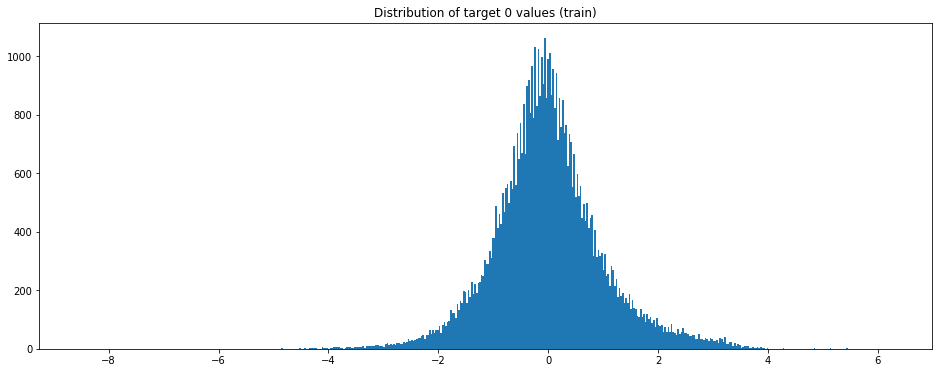

In [6]:
plt.figure(figsize=(16,6))
plt.hist(df_target_train[0], bins=500)
plt.title('Distribution of target 0 values (train)')

Text(0.5,1,'Distribution of target 0 values (val)')

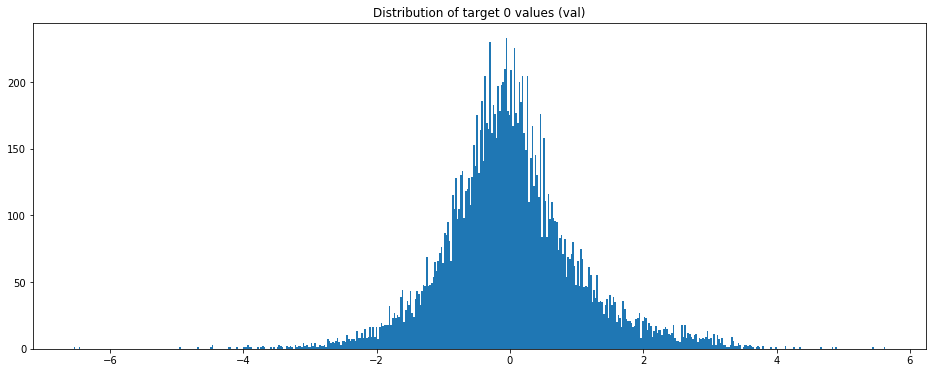

In [7]:
plt.figure(figsize=(16,6))
plt.hist(df_target_val[0], bins=500)
plt.title('Distribution of target 0 values (val)')

Text(0.5,1,'Distribution of target 1 values (train)')

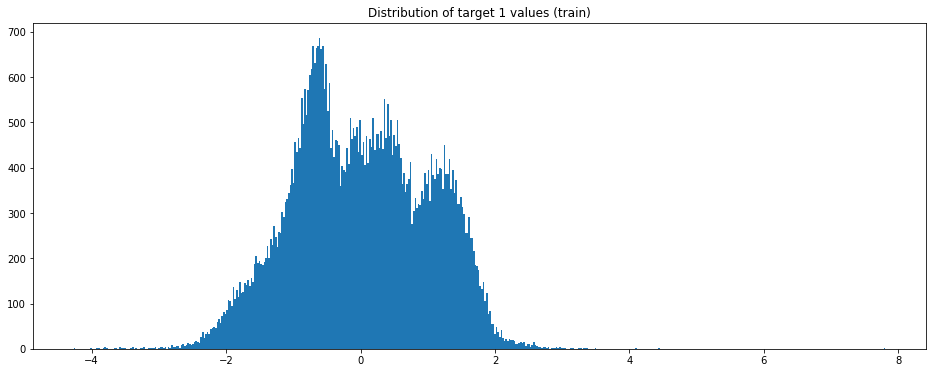

In [8]:
plt.figure(figsize=(16,6))
plt.hist(df_target_train[1], bins=500)
plt.title('Distribution of target 1 values (train)')

Text(0.5,1,'Distribution of target 1 values (val)')

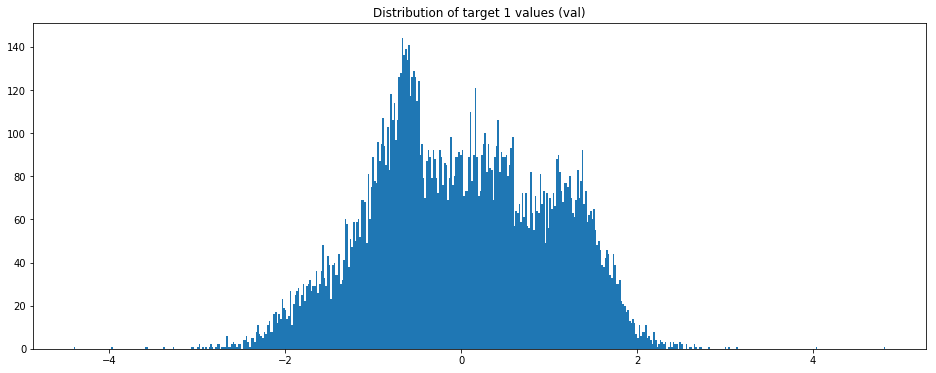

In [9]:
plt.figure(figsize=(16,6))
plt.hist(df_target_val[1], bins=500)
plt.title('Distribution of target 1 values (val)')

Text(0.5,1,'Distribution of target 2 values (train)')

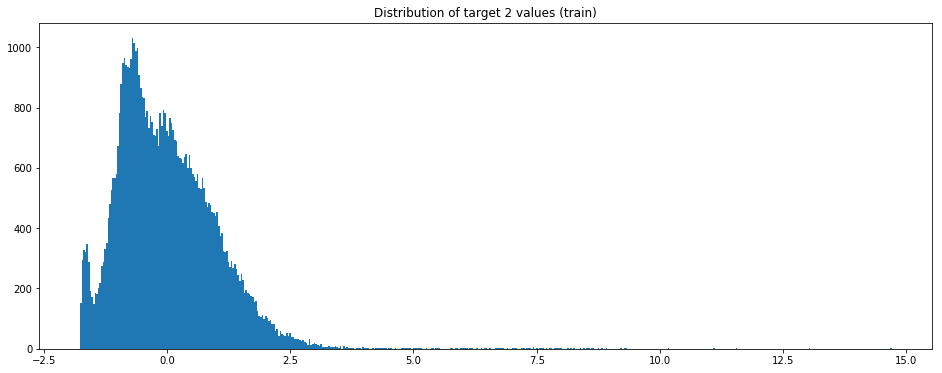

In [10]:
plt.figure(figsize=(16,6))
plt.hist(df_target_train[2], bins=500)
plt.title('Distribution of target 2 values (train)')

Text(0.5,1,'Distribution of target 2 values (val)')

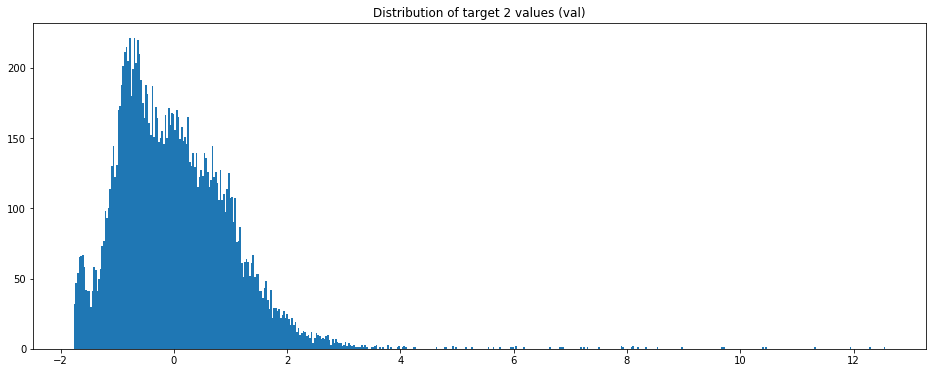

In [11]:
plt.figure(figsize=(16,6))
plt.hist(df_target_val[2], bins=500)
plt.title('Distribution of target 2 values (val)')

Text(0.5,1,'Distribution of target 3 values (train)')

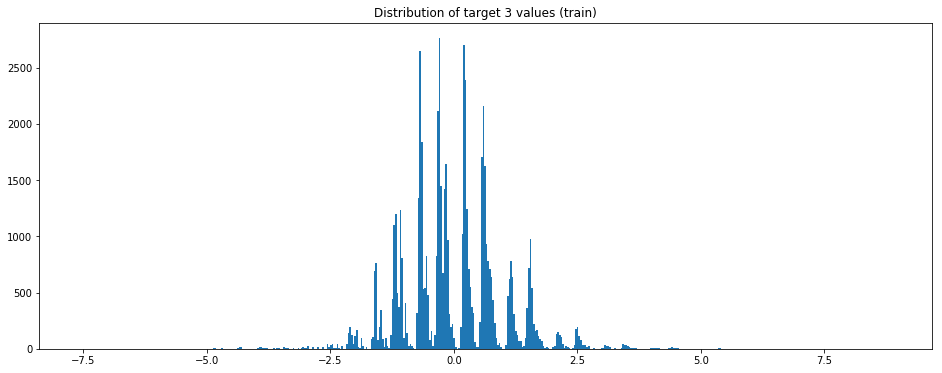

In [12]:
plt.figure(figsize=(16,6))
plt.hist(df_target_train[3], bins=500)
plt.title('Distribution of target 3 values (train)')

Text(0.5,1,'Distribution of target 3 values (val)')

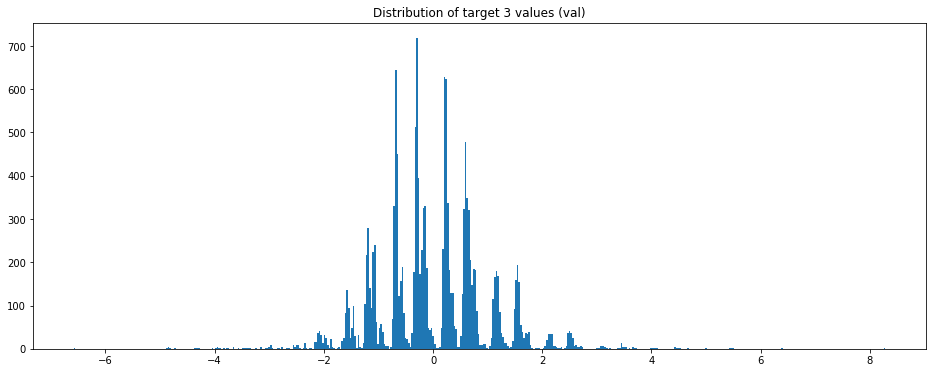

In [13]:
plt.figure(figsize=(16,6))
plt.hist(df_target_val[3], bins=500)
plt.title('Distribution of target 3 values (val)')

In [14]:
preds = pd.read_csv('data/pred_han_sc.txt', index_col=0)
# preds = pd.read_csv('data/predictions_sm.txt', index_col=0)
preds = pd.DataFrame(preds.values.reshape(-1, 18744).T)
preds.head()

,0,1,2,3
0,0.164733,0.126551,-1.451923,1.563350
1,0.012408,-0.599697,0.269806,0.658810
2,0.704176,0.384086,1.249117,0.712745
3,-0.867029,0.842657,1.074173,1.617414
4,0.700497,-0.773373,-0.695963,0.675756


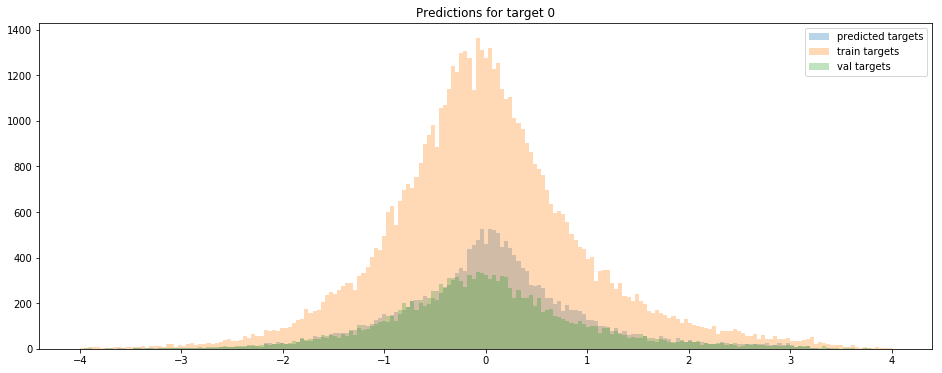

In [15]:
bins = np.linspace(-4, 4, 200)

target = 0
plt.figure(figsize=(16,6))
plt.hist(preds[target].values, bins=bins, alpha=.3, label="predicted targets")
plt.hist(df_target_train[target].values, bins=bins, alpha=.3, label="train targets")
plt.hist(df_target_val[target].values, bins=bins, alpha=.3, label="val targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

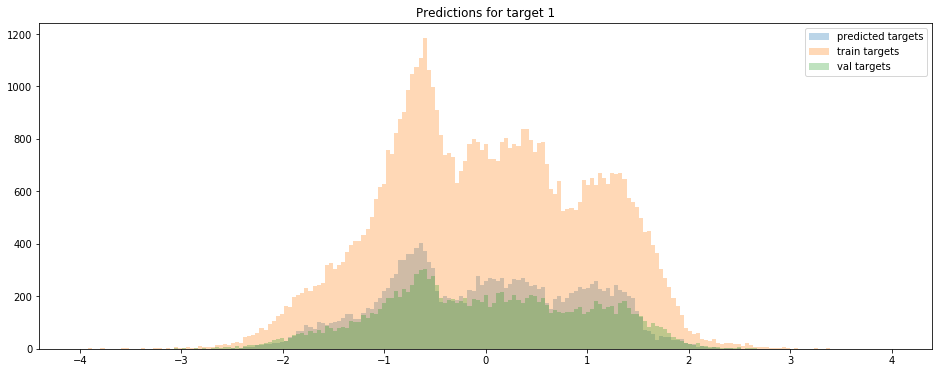

In [16]:
bins = np.linspace(-4, 4, 200)

target = 1
plt.figure(figsize=(16,6))
plt.hist(preds[target].values, bins=bins, alpha=.3, label="predicted targets")
plt.hist(df_target_train[target].values, bins=bins, alpha=.3, label="train targets")
plt.hist(df_target_val[target].values, bins=bins, alpha=.3, label="val targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

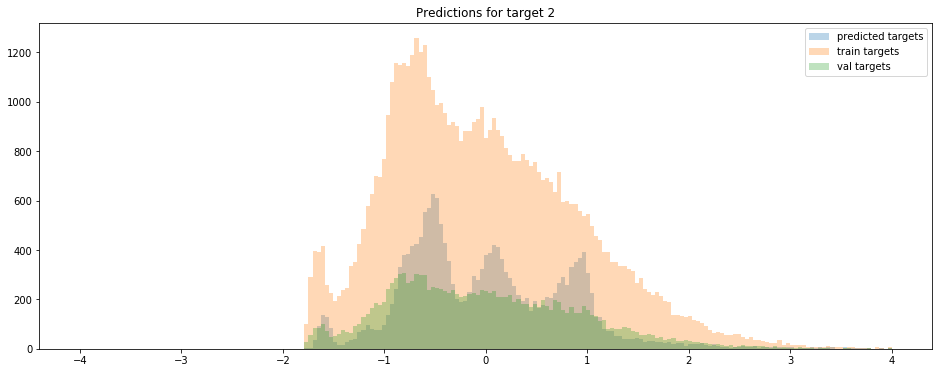

In [17]:
bins = np.linspace(-4, 4, 200)

target = 2
plt.figure(figsize=(16,6))
plt.hist(preds[target].values, bins=bins, alpha=.3, label="predicted targets")
plt.hist(df_target_train[target].values, bins=bins, alpha=.3, label="train targets")
plt.hist(df_target_val[target].values, bins=bins, alpha=.3, label="val targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

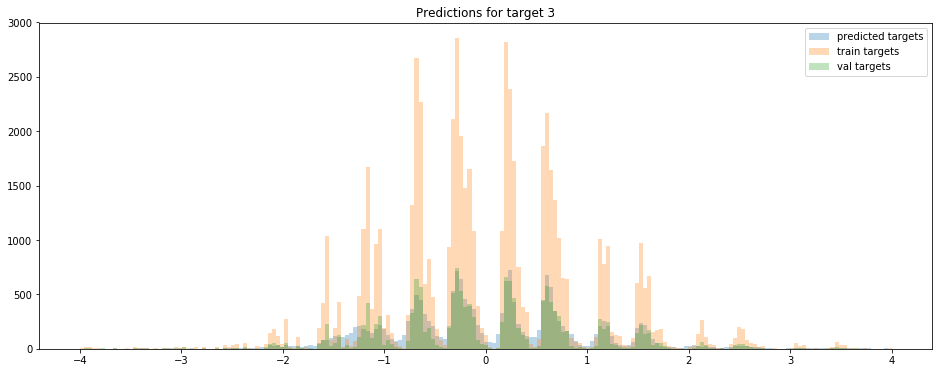

In [18]:
bins = np.linspace(-4, 4, 200)

target = 3
plt.figure(figsize=(16,6))
plt.hist(preds[target].values, bins=bins, alpha=.3, label="predicted targets")
plt.hist(df_target_train[target].values, bins=bins, alpha=.3, label="train targets")
plt.hist(df_target_val[target].values, bins=bins, alpha=.3, label="val targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

In [19]:
preds_train = pd.read_csv('data/pred_train_sc.txt', index_col=0)
preds_train = pd.DataFrame(preds_train.values.reshape(-1, 59980).T)
preds_train.head()

,0,1,2,3
0,2.044171,-0.825700,0.361555,-0.131736
1,0.307386,-0.009855,-0.140604,1.469207
2,0.100913,-1.002926,0.048290,-0.728962
3,-0.459893,0.350498,-0.118103,1.228384
4,-1.164669,0.537743,1.068126,0.602001


In [20]:
preds_val = pd.read_csv('data/pred_val_sc.txt', index_col=0)
preds_val = pd.DataFrame(preds_val.values.reshape(-1, 14995).T)
preds_val.head()

,0,1,2,3
0,-0.697523,0.952883,-1.252231,2.593522
1,-0.460002,-0.606206,0.191560,-0.306699
2,3.004701,-0.522061,-0.800615,-0.276115
3,0.557045,-0.382852,-0.975647,-0.128740
4,-0.152836,-1.736462,2.675487,-0.101196


In [21]:
df_target_train[0].head()

0    2.50670
1   -0.04624
2    0.17969
3   -0.60653
4   -1.22556
Name: 0, dtype: float64

In [22]:
preds_train[0].head()

0    2.044171
1    0.307386
2    0.100913
3   -0.459893
4   -1.164669
Name: 0, dtype: float64

In [23]:
(preds_train[0] - df_target_train[0]).head()

0   -0.462529
1    0.353626
2   -0.078777
3    0.146637
4    0.060891
Name: 0, dtype: float64

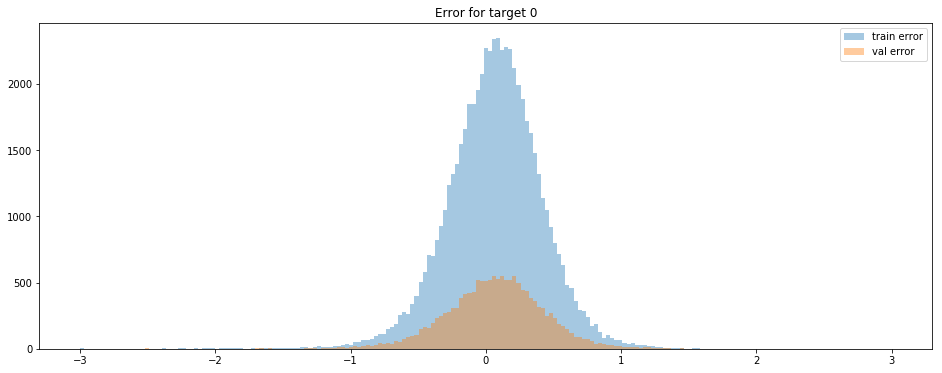

In [24]:
bins = np.linspace(-3, 3, 200)
# bins = 100

target = 0
plt.figure(figsize=(16,6))
plt.hist((preds_train[target]-df_target_train[target]).values, bins=bins, alpha=.4, label="train error")
plt.hist((preds_val[target]-df_target_val[target]).values, bins=bins, alpha=.4, label="val error")
plt.legend()
plt.title("Error for target "+str(target))
plt.show()

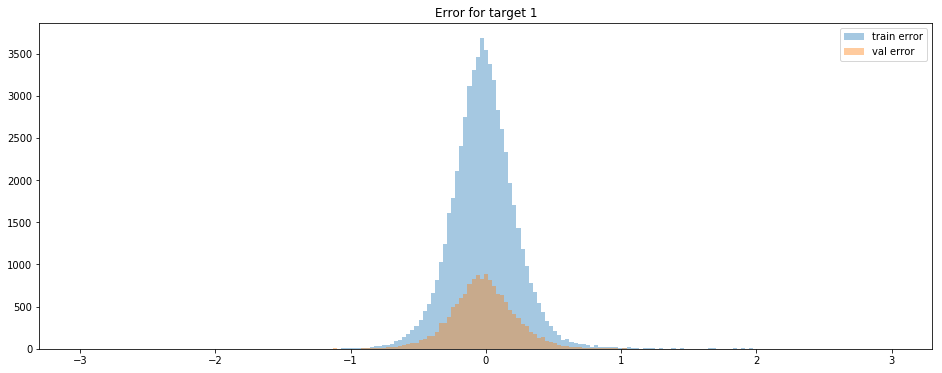

In [25]:
bins = np.linspace(-3, 3, 200)
# bins = 100

target = 1
plt.figure(figsize=(16,6))
plt.hist((preds_train[target]-df_target_train[target]).values, bins=bins, alpha=.4, label="train error")
plt.hist((preds_val[target]-df_target_val[target]).values, bins=bins, alpha=.4, label="val error")
plt.legend()
plt.title("Error for target "+str(target))
plt.show()

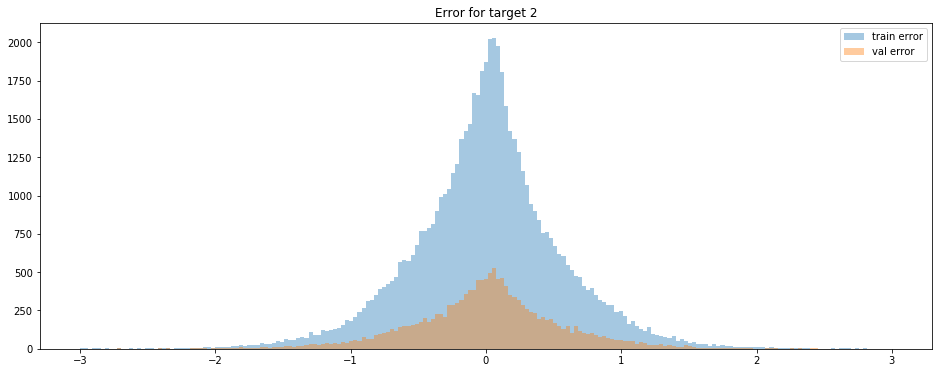

In [26]:
bins = np.linspace(-3, 3, 200)
# bins = 100

target = 2
plt.figure(figsize=(16,6))
plt.hist((preds_train[target]-df_target_train[target]).values, bins=bins, alpha=.4, label="train error")
plt.hist((preds_val[target]-df_target_val[target]).values, bins=bins, alpha=.4, label="val error")
plt.legend()
plt.title("Error for target "+str(target))
plt.show()

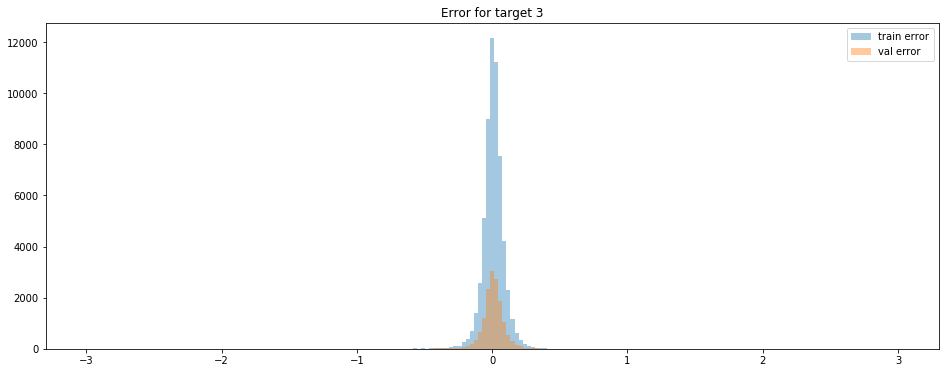

In [27]:
bins = np.linspace(-3, 3, 200)
# bins = 100

target = 3
plt.figure(figsize=(16,6))
plt.hist((preds_train[target]-df_target_train[target]).values, bins=bins, alpha=.4, label="train error")
plt.hist((preds_val[target]-df_target_val[target]).values, bins=bins, alpha=.4, label="val error")
plt.legend()
plt.title("Error for target "+str(target))
plt.show()